## What are the enrollment trends for different course formats over the past 4 years?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(os.path.dirname(os.getcwd()))

## KDD: Modalities: In-person/online 


In [6]:
df = pd.read_excel("data/df_grad_filtered.xlsx")

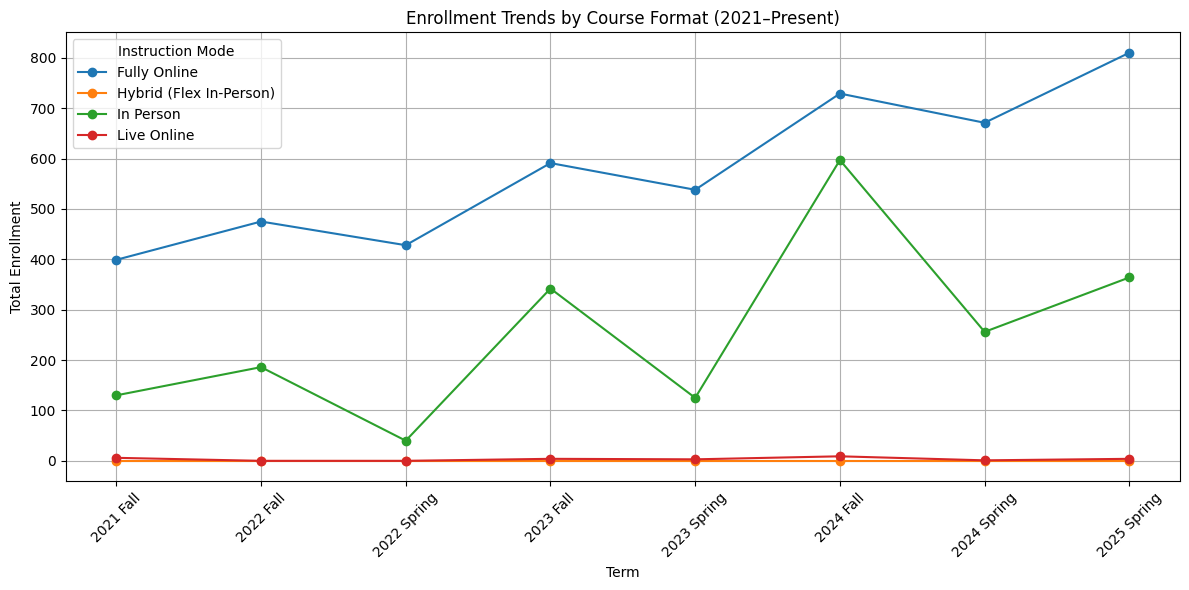

In [8]:
# Extract year and semester from the 'Term' column
df['Year'] = df['Term'].str.extract(r'(\d{4})').astype(int)
df['Semester'] = df['Term'].str.extract(r'([A-Za-z]+)')

# Use the full dataset without filtering recent years
df_full = df.copy()

# Group by year, semester, and instruction mode
format_trend = (
    df_full.groupby(['Year', 'Semester', 'Instruction Mode'])['Total Enroll']
    .sum()
    .reset_index()
)

# Order the semesters
semester_order = ['Spring', 'Summer', 'Fall']
format_trend['Semester'] = pd.Categorical(format_trend['Semester'], categories=semester_order, ordered=True)

# Create a combined label for plotting
format_trend['Term_Label'] = format_trend['Year'].astype(str) + ' ' + format_trend['Semester'].astype(str)

# Sort for chronological plotting
format_trend = format_trend.sort_values(by=['Year', 'Semester'])

# Pivot to wide format for plotting
pivot_df = format_trend.pivot(index='Term_Label', columns='Instruction Mode', values='Total Enroll').fillna(0)

# Plot the trend
pivot_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Enrollment Trends by Course Format (2021–Present)')
plt.xlabel('Term')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Instruction Mode')
plt.show()


**Enrollment Trends by Course Format (2021–Present)**

This line plot shows how enrollment numbers have shifted across academic terms from Fall 2021 to Spring 2025, categorized by instruction mode—such as Fully Online, In Person, Hybrid, and Live Online. The Term column was split into Year and Semester to allow a chronological view of changes over time.

**Outcome:**

The chart clearly shows the dominance of Fully Online courses, with a steady increase in enrollments over time. This trend reflects a strong and growing preference for remote, flexible learning formats among graduate students.

In-Person enrollments show noticeable fluctuations—spiking in some fall terms—suggesting a cyclical or demand-based offering pattern. Meanwhile, Hybrid and Live Online formats consistently record low enrollments, indicating they are either less preferred or less frequently offered. These formats are excluded from further analysis to avoid misleading data interpretations.

Overall, the data supports the insight that online course delivery has become the primary mode of instruction in the graduate program, possibly due to increased accessibility, post-pandemic academic design, or student lifestyle needs.

## Time of Day Analysis: (before 9, 9–12, 12–3, 3–6, after 6)

C:\Users\ramte\AppData\Local\Temp\ipykernel_456\124805530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Meeting Time Start'] = pd.to_datetime(df['Meeting Time Start'], errors='coerce')
C:\Users\ramte\AppData\Local\Temp\ipykernel_456\124805530.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered['Time Slot'] = df_time_filtered['Hour'].apply(time_bucket)


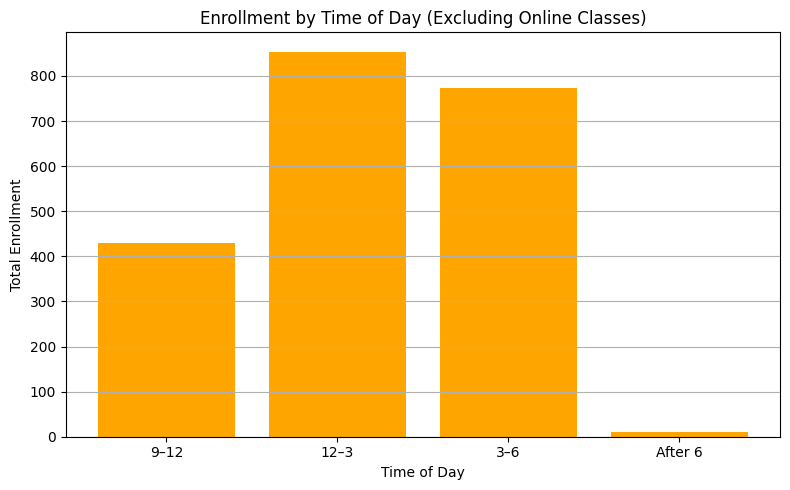

In [9]:
# Convert to datetime
df['Meeting Time Start'] = pd.to_datetime(df['Meeting Time Start'], errors='coerce')

# Extract hour
df['Hour'] = df['Meeting Time Start'].dt.hour

# EXCLUDE rows where hour == 0 (which means '00:00:00')
df_time_filtered = df[df['Hour'] != 0]

# Time-of-day bucket function
def time_bucket(hour):
    if pd.isna(hour):
        return 'Unknown'
    elif hour < 9:
        return 'Before 9'
    elif hour < 12:
        return '9–12'
    elif hour < 15:
        return '12–3'
    elif hour < 18:
        return '3–6'
    else:
        return 'After 6'

# Categorize remaining data
df_time_filtered['Time Slot'] = df_time_filtered['Hour'].apply(time_bucket)

# Summarize enrollments
summary = df_time_filtered.groupby('Time Slot')['Total Enroll'].sum().reset_index()

# Order slots for plot
slot_order = ['Before 9', '9–12', '12–3', '3–6', 'After 6']
summary['Time Slot'] = pd.Categorical(summary['Time Slot'], categories=slot_order, ordered=True)
summary = summary.sort_values('Time Slot')

# Plot
plt.figure(figsize=(8, 5))
plt.bar(summary['Time Slot'], summary['Total Enroll'], color='orange')
plt.title('Enrollment by Time of Day (Excluding Online Classes)')
plt.xlabel('Time of Day')
plt.ylabel('Total Enrollment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**Outcome:**  
To analyze enrollment trends by class timing, entries with a meeting start time of **00:00:00** (representing online or asynchronous classes) were excluded to ensure accurate analysis.

After filtering, classes were grouped into the following time slots:

- **12–3 PM**: Highest enrollment, showing a strong preference for early afternoon classes.  
- **3–6 PM**: Second-highest enrollment, indicating continued interest in late afternoon slots.  
- **9–12 PM**: Moderate enrollment.  
- **After 6 PM**: Very low enrollment, suggesting minimal demand for evening classes.  

This trend suggests that most graduate students prefer classes scheduled during standard daytime hours.


## Enrollment by Scheduled Class Days

In [10]:
# Check for common combinations
print(df['Meeting Days'].unique())

['-' 'TR' 'MW' 'M' 'R' 'T' 'W']


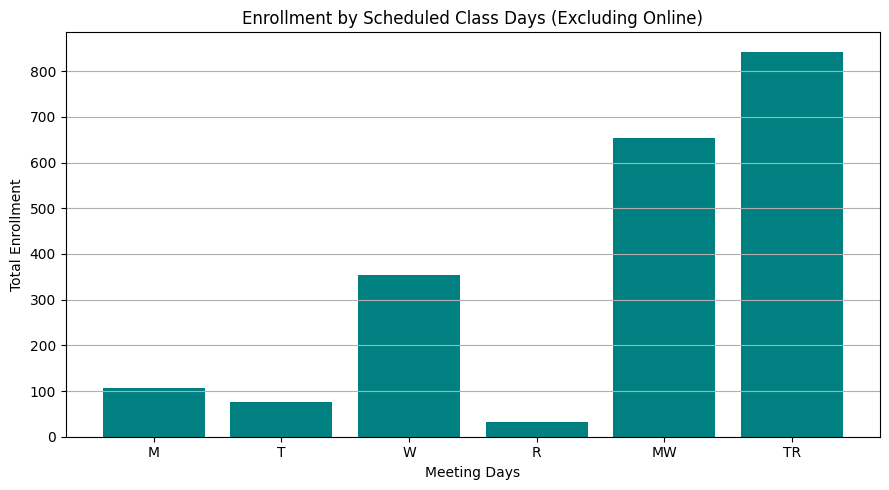

In [ ]:
# Group by Meeting Days and sum Total Enrollment
day_summary = df[df['Meeting Days'] != '-'].groupby('Meeting Days')['Total Enroll'].sum().reset_index()

# Define a custom order (excluding '-')
day_order = ['M', 'T', 'W', 'R', 'MW', 'TR']
day_summary['Meeting Days'] = pd.Categorical(day_summary['Meeting Days'], categories=day_order, ordered=True)
day_summary = day_summary.sort_values('Meeting Days')

# Plot
plt.figure(figsize=(9, 5))
plt.bar(day_summary['Meeting Days'], day_summary['Total Enroll'], color='teal')
plt.title('Enrollment by Scheduled Class Days (Excluding Online)')
plt.xlabel('Meeting Days')
plt.ylabel('Total Enrollment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Outcome:**  
The highest number of enrollments originally fell under '-', representing online or asynchronous courses without fixed meeting days. This category was removed from the visualization to prevent misleading interpretation.

Among the scheduled class days, **TR (Tuesday/Thursday)** has the highest enrollment, followed by **MW (Monday/Wednesday)**, indicating these are the most preferred in-person scheduling patterns.

Single-day classes such as **W**, **M**, **T**, and especially **R** show noticeably lower enrollment numbers, suggesting they are less favored by students.

This trend shows that students prefer classes spread across two days a week, specifically TR and MW combinations, aligning with common graduate scheduling formats.


## Fall vs. Spring Enrollment by Course Format (2021–2025 Combined)

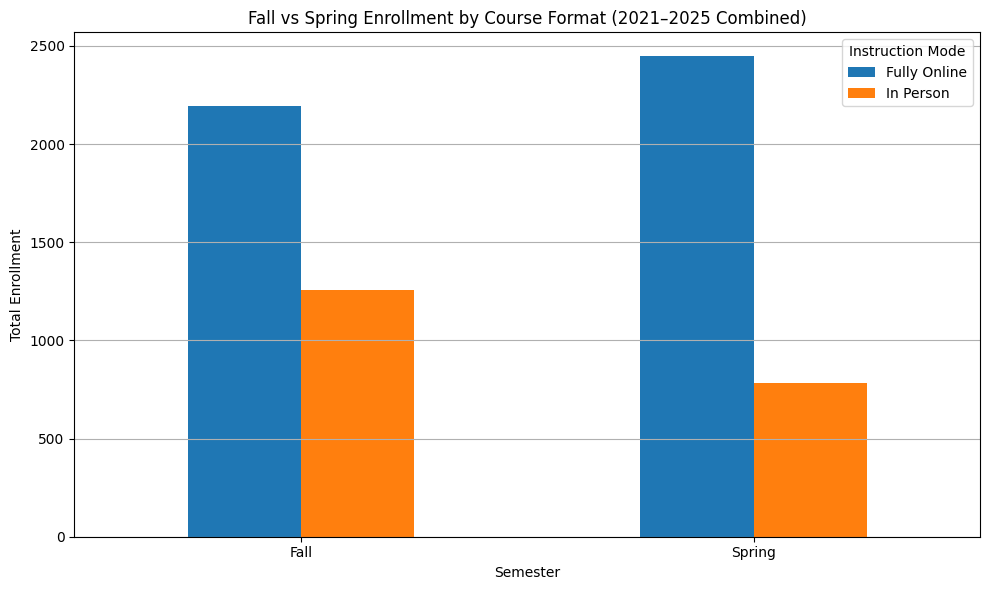

In [ ]:
# Filter only Fall and Spring semesters
df_filtered = df[df['Semester'].isin(['Fall', 'Spring'])]

# Filter only 'In Person' and 'Fully Online' modes
df_filtered = df_filtered[df_filtered['Instruction Mode'].isin(['In Person', 'Fully Online'])]

# Group and summarize enrollment
summary = df_filtered.groupby(['Semester', 'Instruction Mode'])['Total Enroll'].sum().reset_index()

# Pivot for plotting
pivot_summary = summary.pivot(index='Semester', columns='Instruction Mode', values='Total Enroll').fillna(0)

# Plot
pivot_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Fall vs Spring Enrollment by Course Format (2021–2025 Combined)')
plt.xlabel('Semester')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Instruction Mode')
plt.show()



**Outcome:**  
Fully Online courses had the highest enrollment in both **Fall** and **Spring** semesters, showing a consistent preference for remote learning among graduate students.

**In-person enrollment was higher in Fall** than in Spring, suggesting either greater availability of face-to-face classes or higher demand during the Fall term due to higher enrollment of student at the university.

This trend highlights that while online formats remain dominant year-round, Fall semesters tend to see a relative rise in in-person participation.


## Enrollment by Course Format (Grouped by Year)

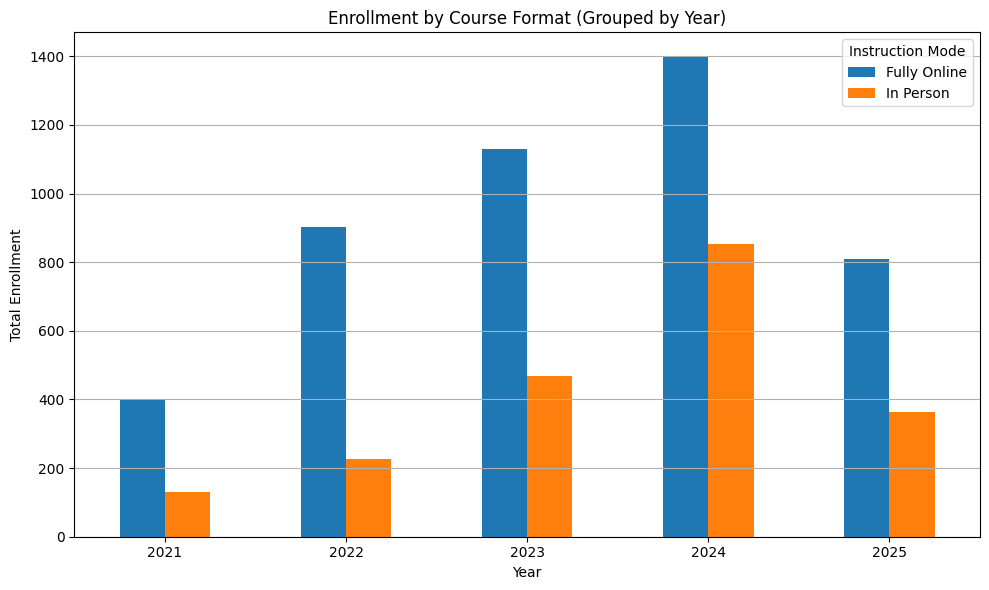

In [ ]:
# Extract Year from Term
df['Year'] = df['Term'].str.extract(r'(\d{4})').astype(int)

# Filter only 'Fully Online' and 'In Person'
df_filtered = df[df['Instruction Mode'].isin(['In Person', 'Fully Online'])]

# Group by Year and Instruction Mode
yearly_summary = df_filtered.groupby(['Year', 'Instruction Mode'])['Total Enroll'].sum().reset_index()

# Pivot for plotting
pivot_year = yearly_summary.pivot(index='Year', columns='Instruction Mode', values='Total Enroll').fillna(0)

# Plot
pivot_year.plot(kind='bar', figsize=(10, 6))
plt.title('Enrollment by Course Format (Grouped by Year)')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Instruction Mode')
plt.show()


**Outcome:**  
Fully Online enrollments consistently led across all years, rising steadily from **2021 to 2024**, before experiencing a slight drop in **2025**. This reflects a strong and growing preference for flexible remote learning options.

In-Person enrollments also increased during the same period, **peaking in 2024**, which may signal institutional efforts to offer more face-to-face classes or increasing student interest in hybrid academic experiences post-pandemic.


## Enrollment by Course Duration (15-week vs 7-week)

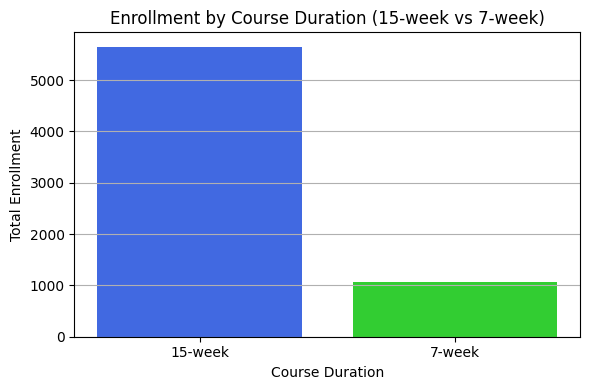

In [ ]:
# Map only the sessions we care about
duration_map = {
    'Regular Academic Session': '15-week',
    'Seven Week - First': '7-week',
    'Seven Week - Second': '7-week'
}

# Apply mapping to create a new column
df['Course Duration'] = df['Session'].map(duration_map)

# Filter valid durations
df_filtered = df[df['Course Duration'].isin(['15-week', '7-week'])]

# Group and summarize enrollments
summary = df_filtered.groupby('Course Duration')['Total Enroll'].sum().reset_index()

# Plot
plt.figure(figsize=(6, 4))
plt.bar(summary['Course Duration'], summary['Total Enroll'], color=['royalblue', 'limegreen'])
plt.title('Enrollment by Course Duration (15-week vs 7-week)')
plt.xlabel('Course Duration')
plt.ylabel('Total Enrollment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This chart compares total enrollment in 15-week full semester and 7-week accelerated courses, using the Session column to classify each course type.

**Outcome:**

15-week courses clearly dominate in total enrollments, confirming they are the primary format used in the graduate curriculum.

7-week courses are present but show significantly lower enrollments, indicating they are either used for specific subjects, offered less frequently, or serve a niche student population.

This suggests that while some flexibility exists through 7-week sessions, the program still relies heavily on the traditional 15-week schedule for most of its course delivery.

## Enrollment by Class Topic


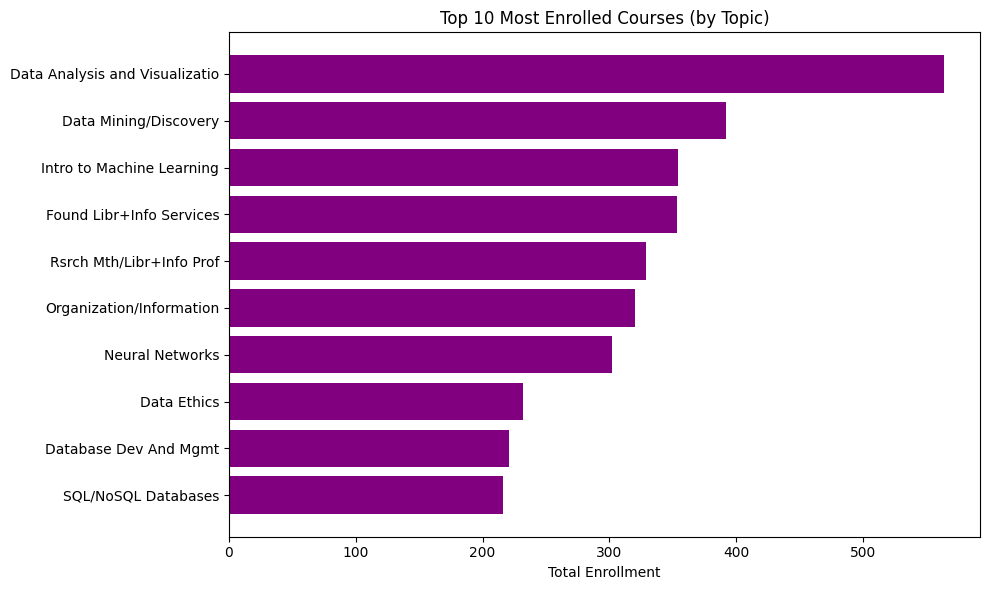

In [15]:


# Group by course description
course_summary = df.groupby('Course Description')['Total Enroll'].sum().reset_index()

# Sort and select top 10
top_courses = course_summary.sort_values(by='Total Enroll', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_courses['Course Description'], top_courses['Total Enroll'], color='purple')
plt.title('Top 10 Most Enrolled Courses (by Topic)')
plt.xlabel('Total Enrollment')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


**Outcome:**  
This chart highlights the **top 10 most-enrolled graduate courses** by topic. 

**Data Analysis and Visualization** leads significantly, followed by **Data Mining/Discovery** and **Intro to Machine Learning**, indicating strong interest in data-focused and applied machine learning topics.

Other frequently enrolled subjects include foundational courses like **Foundations of Library and Information Services**, **Research Methods**, and **Neural Networks**, showing a balanced demand for both theoretical and technical skills.

This distribution reflects program emphasis on core data science competencies alongside foundational information science education.


## Enrollment Share by School / Subject Code

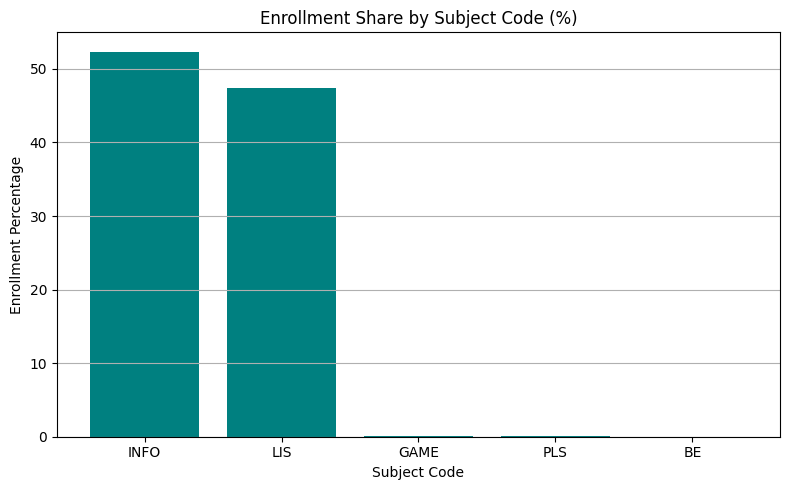

In [16]:
# Group by Subject Code and calculate total enrollment
subject_summary = df.groupby('Subject Code')['Total Enroll'].sum().reset_index()

# Calculate percentages
total = subject_summary['Total Enroll'].sum()
subject_summary['Percentage'] = (subject_summary['Total Enroll'] / total) * 100

# Sort by percentage
subject_summary = subject_summary.sort_values(by='Percentage', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(subject_summary['Subject Code'], subject_summary['Percentage'], color='teal')
plt.title('Enrollment Share by Subject Code (%)')
plt.xlabel('Subject Code')
plt.ylabel('Enrollment Percentage')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


This chart shows each subject's percentage share of total enrollment, giving a clearer picture of how enrollment is distributed across departments.

**Outcome:**

INFO and LIS together account for the vast majority of enrollments, emphasizing their central role in the program.

Other subject codes like GAME, PLS, and BE make up a small percentage of the total, pointing to limited offerings or smaller student interest.

**The further trend analysis will be performed in a different folder.**